# AutoPipeline
- Ref: https://huggingface.co/docs/diffusers/v0.34.0/en/tutorials/autopipeline?autopipeline=text-to-image

In [1]:
#@title
import torch

if torch.backends.mps.is_available():
    t_device = torch.device("mps")
    s_device = "mps"
    print(f"Current memory allocated on MPS: {torch.mps.current_allocated_memory()} bytes")
    print(f"Driver memory allocated on MPS: {torch.mps.driver_allocated_memory()} bytes")
    if torch.mps.driver_allocated_memory() - torch.mps.current_allocated_memory()< 1e9:
        print("Not enough mps memory, convert to cpu mode")
        t_device = torch.device("cpu")
        s_device = "cpu"
elif torch.cuda.is_available():
    t_device = torch.device("cuda")
    s_device = "cuda"
else:
    t_device = torch.device("cpu")
    s_device = "cpu"
print(t_device)

t_device = torch.device("cpu")
s_device = "cpu"

cuda


## 1. Text-to-image

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

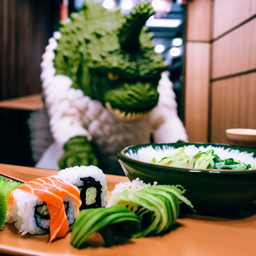

In [6]:
from diffusers import AutoPipelineForText2Image
import torch

if s_device == "cuda":
    pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
        "dreamlike-art/dreamlike-photoreal-2.0", 
        torch_dtype=torch.float16, 
        use_safetensors=True
    ).to(t_device)
else:
    pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
        "dreamlike-art/dreamlike-photoreal-2.0", 
        use_safetensors=True
    ).to(t_device)

prompt = "cinematic photo of Green Godzilla eating sushi with a cat in a izakaya, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device=t_device).manual_seed(37)
image = pipe_txt2img(prompt, generator=generator).images[0]
image.resize((256, 256))

## 2. Image-to-image

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

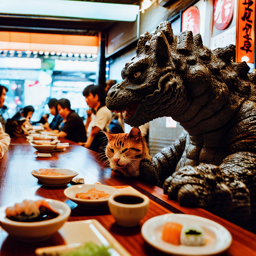

In [2]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

if s_device == "cuda":
    pipe_img2img = AutoPipelineForImage2Image.from_pretrained(
        "dreamlike-art/dreamlike-photoreal-2.0", 
        torch_dtype=torch.float16, 
        use_safetensors=True
    ).to(t_device)
else:
    pipe_img2img = AutoPipelineForImage2Image.from_pretrained(
        "dreamlike-art/dreamlike-photoreal-2.0", 
        use_safetensors=True
    ).to(t_device)

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-text2img.png")

init_image.resize((256, 256))

## 3. Inpainting

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

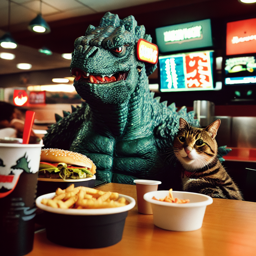

In [3]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch
if s_device == "cuda":
    pipeline = AutoPipelineForInpainting.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0", 
        torch_dtype=torch.float16, 
        use_safetensors=True
    ).to(t_device)
else:
    pipeline = AutoPipelineForInpainting.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0", 
        use_safetensors=True
    ).to(t_device)

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-img2img.png")
init_image.resize((256, 256))

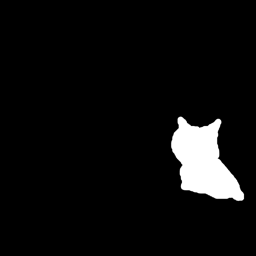

In [4]:
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-mask.png")

mask_image.resize((256, 256))

  0%|          | 0/20 [00:00<?, ?it/s]

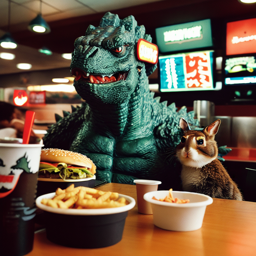

In [5]:
prompt = "cinematic photo of a white rabbit, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device="cpu").manual_seed(38)
image = pipeline(prompt, image=init_image, 
                 mask_image=mask_image, 
                 generator=generator, strength=0.4).images[0]
image.resize((256, 256))